<a href="https://colab.research.google.com/github/jeetu-g2-1/Deep-Learning_NPTEL/blob/main/Sigmoid_Implenetation_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

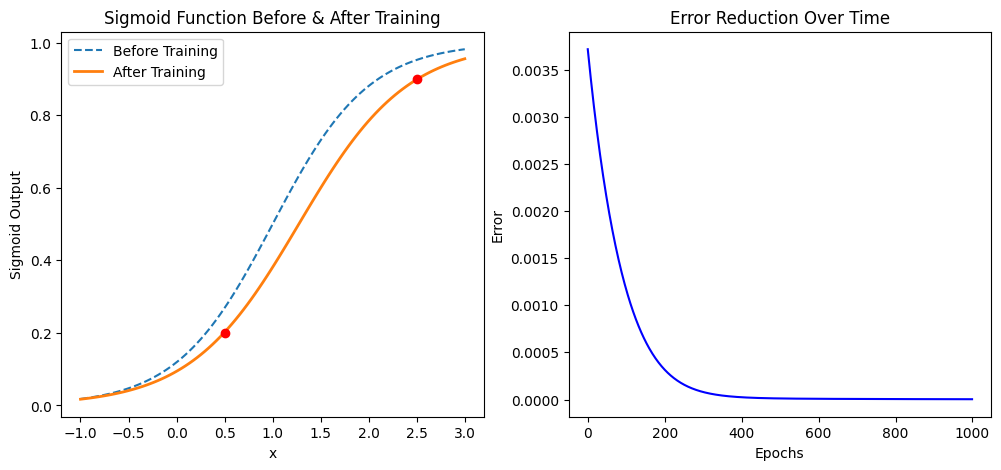

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data Points
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Sigmoid Function
def sigmoid(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

# Error Function
def error(w, b):
    return 0.5 * sum((sigmoid(w, b, X) - Y) ** 2)

# Gradient Computation
def grad_b(w, b, x, y):
    fx = sigmoid(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = sigmoid(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

# Gradient Descent
eta, max_epochs = 0.1, 1000
w, b = 2, -2
errors, w_vals, b_vals = [], [], []
for _ in range(max_epochs):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += grad_w(w, b, x, y)
        db += grad_b(w, b, x, y)
    w -= eta * dw
    b -= eta * db
    errors.append(error(w, b))
    w_vals.append(w)
    b_vals.append(b)

# Plot Sigmoid Before and After Training
x_vals = np.linspace(-1, 3, 100)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_vals, sigmoid(2, -2, x_vals), label='Before Training', linestyle='dashed')
plt.plot(x_vals, sigmoid(w, b, x_vals), label='After Training', linewidth=2)
plt.scatter(X, Y, color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Function Before & After Training')
plt.legend()

# Error Reduction over Epochs
plt.subplot(1, 2, 2)
plt.plot(range(max_epochs), errors, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Reduction Over Time')
plt.show()

# 3D Plot for Gradient Descent Path
fig = go.Figure(data=[go.Scatter3d(x=w_vals, y=b_vals, z=errors,
                                   mode='lines', marker=dict(size=4, color=errors, colorscale='Viridis'))])
fig.update_layout(title='Gradient Descent Path',
                  scene=dict(xaxis_title='w', yaxis_title='b', zaxis_title='Error'))
fig.show()
